# Taller 2: operaciones de transformación del histograma

### Sebastián Palma

### David Tobón Molina

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage import exposure

In [78]:
def get_histogram(img):
    return cv2.calcHist([img],[0],None,[256],[0,256])

# 1. Calibración del histograma

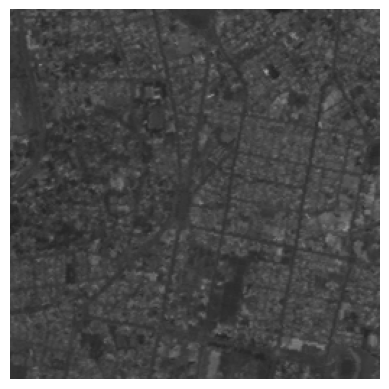

In [79]:
quito_img = cv2.imread('images/QUITO.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(quito_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

### 1.3. Visualice el histograma de la imagen. Describa su forma. ¿Cuáles son los niveles de gris mínimo y máximo?. 

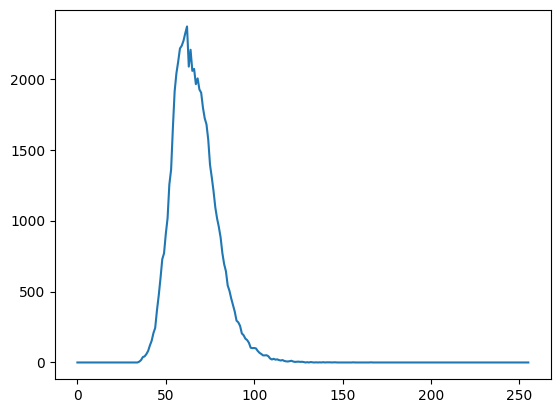

In [80]:
quito_hist = get_histogram(quito_img)
plt.plot(quito_hist)
plt.show()

In [81]:
print(np.min(quito_img), np.max(quito_img))

35 166


El histograma tiene su mayor densidad en un gran pico alrededor de los niveles de intensidad entre 40 y 100, donde el pico obtiene su máximo valor (mayor números de píxeles) para el nivel de intensidad de grises de 60. Las demás áreas del histograma son planas.

Al observar el histograma parece que el nivel de gris mínimo es 40 y el máximo es de 130. Aunque, usando las funciones de numpy, se obtiene que el valor de intensidad mínimo es 35 y el máximo es 166, pero al tener pocos píxeles con dado nivel de intensidad, esto no es observable en el histograma con su zoom actual. 

### 1.4 Efectúe una expansión del contraste, visualice la imagen resultado y el histograma correspondiente. ¿En qué consiste la mejora de la imagen?

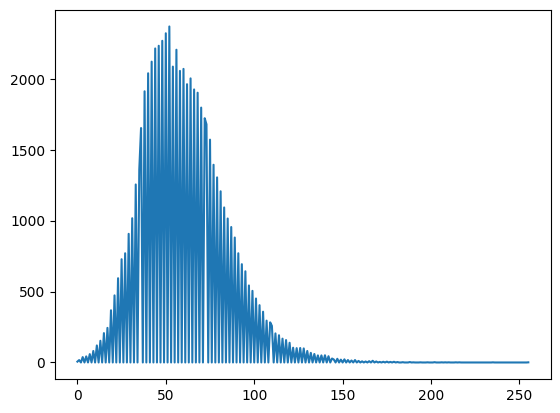

In [82]:
A, B = 35, 166
C, D = 0, 255
rescaled_img = exposure.rescale_intensity(quito_img, in_range=(A,B), out_range=(C,D)).astype(np.uint8)

rescaled_hist = get_histogram(rescaled_img)
plt.plot(rescaled_hist)
plt.show()

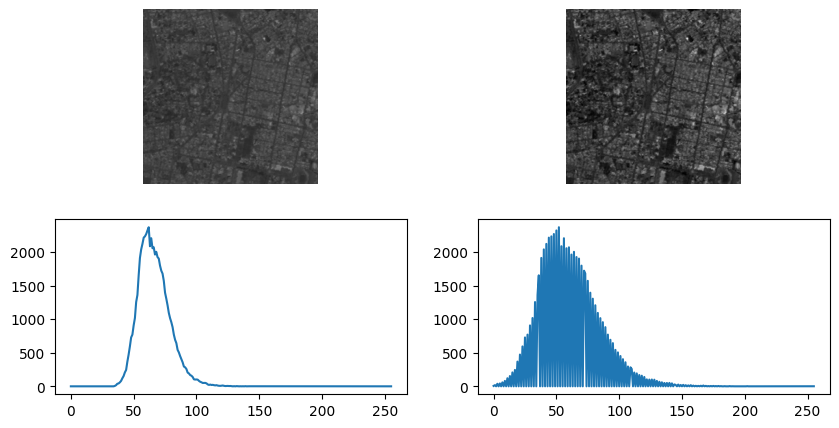

In [83]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(quito_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(rescaled_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(quito_hist)

plt.subplot(2,2,4)
plt.plot(rescaled_hist)

plt.show()

La mejora de la imagen consiste en expandir el rango dinámico de la imagen, es decir, aumentar el contraste. Esto se logra al mapear los valores de intensidad de la imagen original (que van de 35 a 166) a un nuevo rango (de 0 a 255). Como resultado, los detalles que antes eran difíciles de distinguir debido a la falta de contraste ahora son más visibles, lo que mejora la calidad visual de la imagen. 

### 1.5 También es posible efectuar una expansión del contraste entre dos valores particulares. Se trata de una transformación lineal del histograma, que permite especificar 2 niveles de gris que deben ser respectivamente llevados a 0 y 255. Esta transformación se llama calibración del histograma.

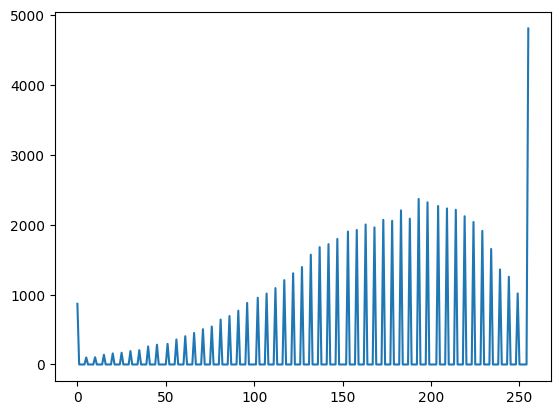

In [84]:
A, B = 50, 100
D, C = 0, 255
rescaled_img = exposure.rescale_intensity(quito_img, in_range=(A,B), out_range=(C,D)).astype(np.uint8)

rescaled_hist = get_histogram(rescaled_img)
plt.plot(rescaled_hist)
plt.show()

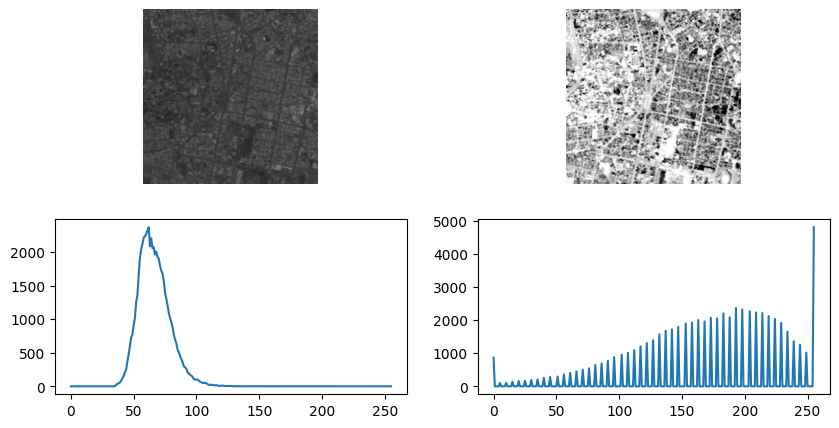

In [85]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(quito_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(rescaled_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(quito_hist)

plt.subplot(2,2,4)
plt.plot(rescaled_hist)

plt.show()

Esta transformación busca expandir el nivel de detalle que se encuentra en los tonos de grises entre 50 y 100 (A y B), lo que hace que los detalles que se encuentran en ese rango de intensidad sean más visibles. Sin embargo, al expandir el contraste entre esos niveles de gris, se pierde información en los niveles de intensidad por debajo de 50 y por encima de 100, lo que puede resultar en una pérdida de detalles en esas áreas y la saturación de los tonos extremos. Por lo tanto, aunque se mejora la visibilidad de los detalles entre 50 y 100, se sacrifica la información en los extremos del rango de intensidad.

### Efectúe 3 calibraciones diferentes del histograma sobre la imagen original, entre los valores 50-100, 40-120 y 35-166. Visualice los resultados.

In [86]:
a_b_list = [(50, 100), (40,120), (35,166)]
C, D = 0, 255

hist_list = []
rescaled_ims = []
for ab in a_b_list:
    a, b = ab
    rescaled_img = exposure.rescale_intensity(quito_img, in_range=(a,b), out_range=(C,D)).astype(np.uint8)
    rescaled_ims.append(rescaled_img)
    hist_list.append(get_histogram(rescaled_img))
    

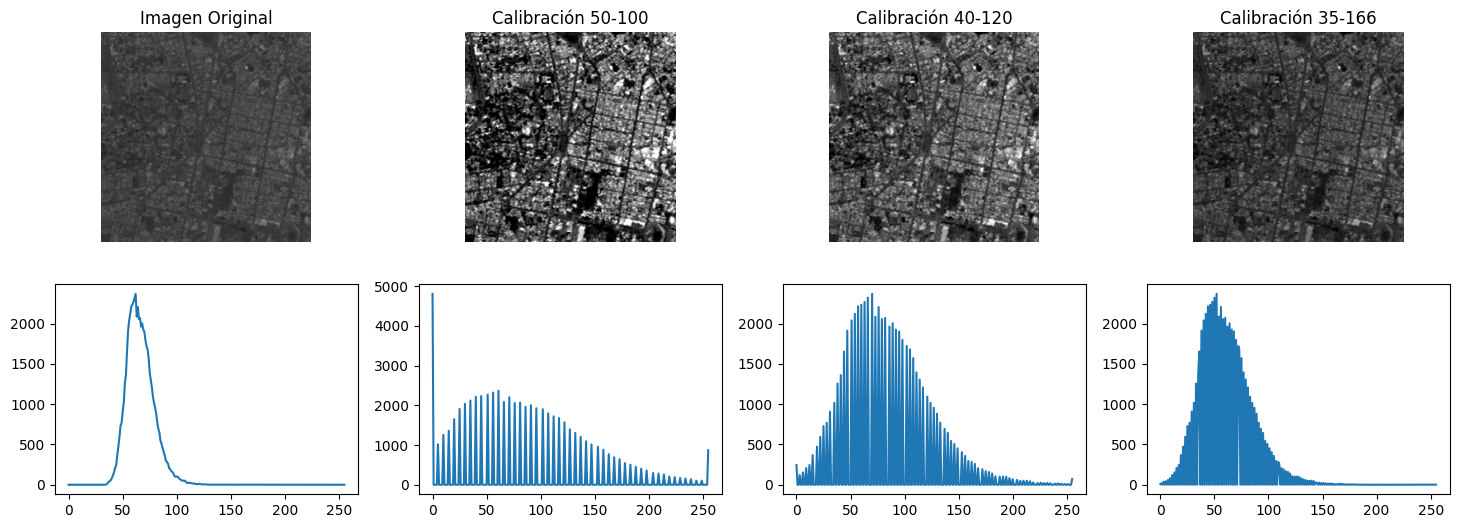

In [87]:
plt.figure(figsize=(18, 6))

plt.subplot(2, 4, 1)
plt.imshow(quito_img, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.plot(quito_hist)


for i, (a, b) in enumerate(a_b_list):
    plt.subplot(2, 4, i+2)
    plt.imshow(rescaled_ims[i], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Calibración {a}-{b}')
    plt.axis('off')
    
    plt.subplot(2, 4, i+6)
    plt.plot(hist_list[i])

### ¿Cuál es la diferencia entre estas imágenes? ¿Cuál presenta el mejor contraste? ¿Cuál permite ver mejor los detalles? ¿Por qué la calibración entre 35 y 166 da el mismo resultado que la expansión del contraste efectuada en el punto 4? ¿Conclusión?

La diferencia entre las imágenes radica en el rango de niveles de gris que se han expandido. Para un determinado rango, mayor es el contraste en las áreas específicas donde predominaban esas intensidades. Adicionalmente, al tomar un rango de calibración menor, la transformación es más agresiva, provocando que una mayor parte de la imagen se sature, lo que puede resultar en una pérdida de detalles en las áreas fuera del rango seleccionado. Por ejemplo en la calibración de tonos de grises entre 50 y 100, todos los píxeles con niveles de intensidad por debajo de 50 se vuelven completamente negros (0), y los píxeles por encima de 100 se vuelven blancos (255). La calibración 40-120 es un punto intermediom y la de 35-166 es la más conservadora, donde no se satura ningún píxel porque el rango de los niveles de gris de la imagen original era [35, 166].

La imagen de mayor contraste es la resultante de la calibración de los niveles de gris entre 50-100, la cual tiene la máxima diferencia de intensidad entre las áreas más claras y oscuras. La imagen de calibración 40-120 también tiene un alto contraste pero la transformación se observa menos agresiva ya que hay una menor cantidad de zonas que presentan la máxima diferencia.

Simplemente observando las imágenes, la resultante de la calibración entre para niveles de intensidad de grieses entre 40-120 (calibración intermedia) es la que permite ver mejor los detalles, ya que no se aumenta el rango dinámico de la imagen mientras que se logra un baja saturación. Visualmente se nota un trazado de las manzanas más definido, al igual que los bordes de las estructuras de mayor y mediano tamaño. 

La calibración entre 35 y 166 da el mismo resultado que la expansión de contraste global porque 35 y 166 son los valores mínimo ($I_{min}$) y máximo ($I_{max}$) reales de la imagen original. En el punto *4* se utilizaron estos mismos valores para expandir el rango dinámico de la imagen, lo que resultó en una transformación que mapeó el valor mínimo a 0 y el valor máximo a 255, sin saturar ningún píxel. Por lo tanto, ambas transformaciones producen el mismo resultado porque están utilizando los mismos valores de intensidad para realizar la expansión del contraste.

La expansión de contraste (Punto 4) es una técnica de mejora global que optimiza la imagen sin perder información, aprovechando todo el rango dinámico disponible (0-255). Por el contrario, la calibración selectiva es una herramienta de análisis específico. Sacrifica información en los extremos (zonas oscuras y luminosas) para aumentar artificialmente el contraste en un rango de interés, lo que facilita la detección de patrones que de otro modo serían muy tenues para el ojo humano.

# 2. Ecualización del histograma

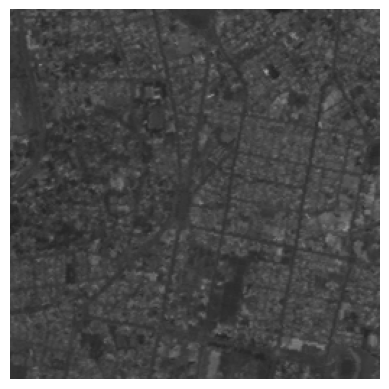

In [88]:
quito_img = cv2.imread('images/QUITO.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(quito_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

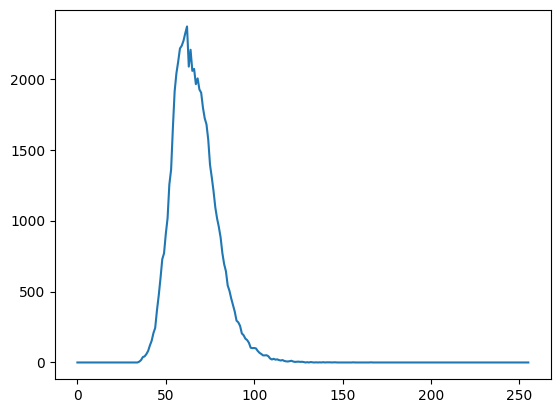

In [89]:
quito_hist = get_histogram(quito_img)
plt.plot(quito_hist)
plt.show()

### 2.4 Efectúe una ecualización del histograma, visualice la imagen resultado y su histograma. En este caso particular, ¿a qué se debe la discontinuidad del histograma ecualizado?

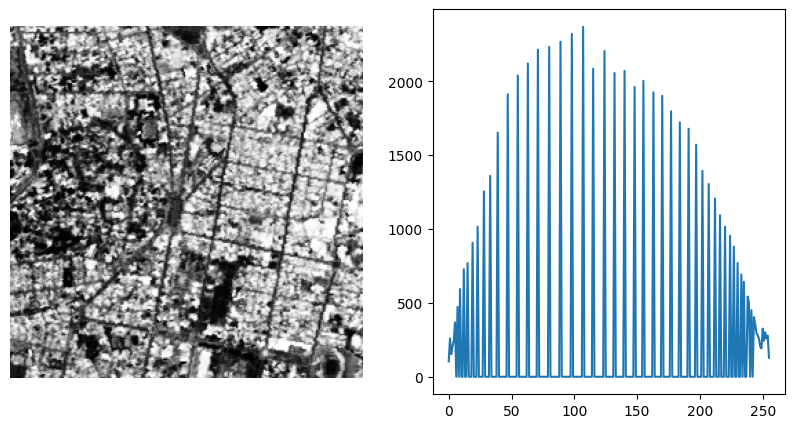

In [90]:
quito_equ = cv2.equalizeHist(quito_img)
quito_equ_hist = get_histogram(quito_equ)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(quito_equ, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(quito_equ_hist)
plt.show()

La discontinuidad se debe a que la ecualización del histograma redistribuye los niveles de intensidad de la imagen original para lograr una distribución más uniforme. Dado a que el histograma es discreto, y los valores de intensidad de la imagen original se encuentran en un rango específico y estrecho, la ecualización redistribuye las intensidades de los píxeles existente, cambia el valor de la intensidad pero no su frecuencia, por lo que no se crean frecuencias de intensidades nuevas, sino que se redistribuyen las frecuencias existentes. Esto puede resultar en una distribución de intensidades que no es completamente uniforme, lo que se refleja en la discontinuidad del histograma ecualizado. El número de barras del histograma no aumento, solo se redistribuye.

### 2.5 Efectúe una segunda vez esta operación. Es decir, aplique una ecualización del histograma a la imagen resultado del punto anterior. ¿Qué pasa? ¿Por qué?

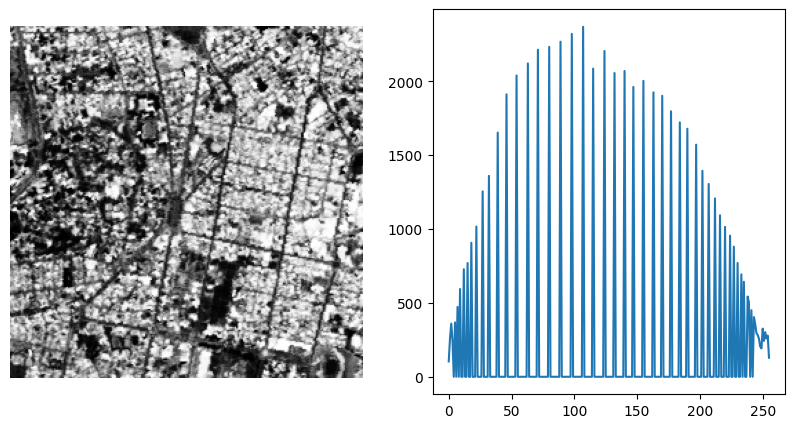

In [91]:
quito_equ2 = cv2.equalizeHist(quito_equ)
quito_equ2_hist = get_histogram(quito_equ2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(quito_equ2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(quito_equ2_hist)
plt.show()

No se notan que hayan cambios en la imagen o en el histograma, esto se debe a que la ecualización previo ya redistribuyó los niveles de intensidad de la imagen para lograr una distribución lo más uniforme posible, una vez que los niveles de gris han sido redistribuidos de la forma más uniforme que permiten los datos discretos de la imagen, la función de transferencia se vuelve aproximadamente lineal, haciendo que una segunda o tercera ecualización no tengan un efecto significativo en el histograma, volviendosa casi una operación idempotente.

### 2.6. Repita las operaciones 1 a 4 con la imagen baboon.png. ¿Cómo es el resultado de esta transformación comparado con la ecualización de la imagen precedente (quito.png)? ¿Por qué?

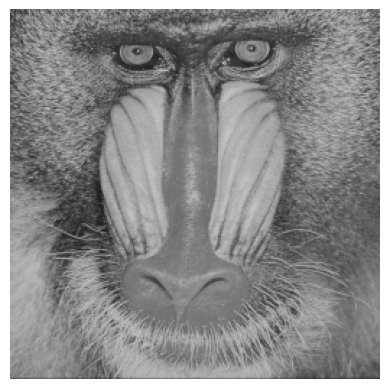

In [92]:
baboon_img = cv2.imread('images/baboon.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(baboon_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

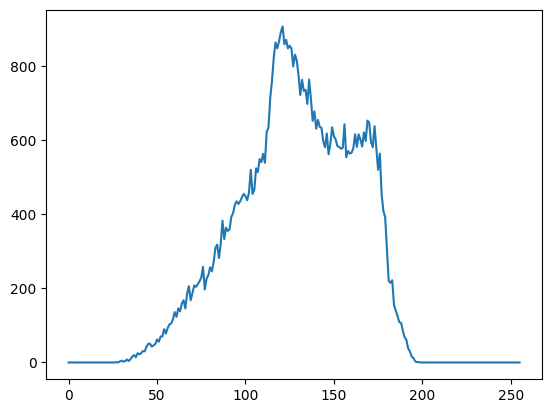

In [93]:
baboon_hist = get_histogram(baboon_img)
plt.plot(baboon_hist)
plt.show()

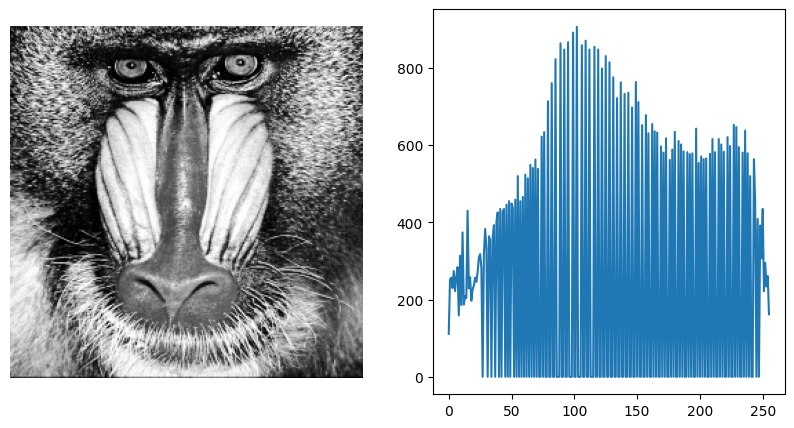

In [94]:
baboon_equ = cv2.equalizeHist(baboon_img)
baboon_equ_hist = get_histogram(baboon_equ)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(baboon_equ, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(baboon_equ_hist)
plt.show()

La composición de la imagen de *baboon.png* es inicialmente diferente a la de *quito.png*, pues al ver su histograma se observa un contraste inicial mayor y una distribución de niveles de intensidad de gris más amplia: de 30 a 200 en comparación de 40 a 120. Como la imagen de *quito.png* tiene un contraste muy bajo y un histograma más agrupado, la ecualización genera un cambio visual más significativo y una redistribución más notoria de los niveles de intensidad.

El histograma de *baboon.png* ecualizado muestra una distribución sin tanta discontinuidad como el de *quito.png*. Al haber más niveles de gris presentes en la imagen original, la ecualización puede distribuir los niveles de intensidad de manera más uniforme sin crear tantas brechas en el histograma resultante, aunque sigue habiendo cierta discontinuidad debido a la naturaleza discreta de los datos.

# 3. Comparación entre diferentes transformaciones del histograma

# 4. Umbralización simple

# 5. Umbralización doble

# 6. Ejercicio de síntesis taller 2